In [1]:
import warnings
warnings.filterwarnings("ignore")

# **Machine Learning Overview**
---

This notebook is dedicated to the fundamentals of machine leanrning.

---
## 1. Confusion Matrix
---

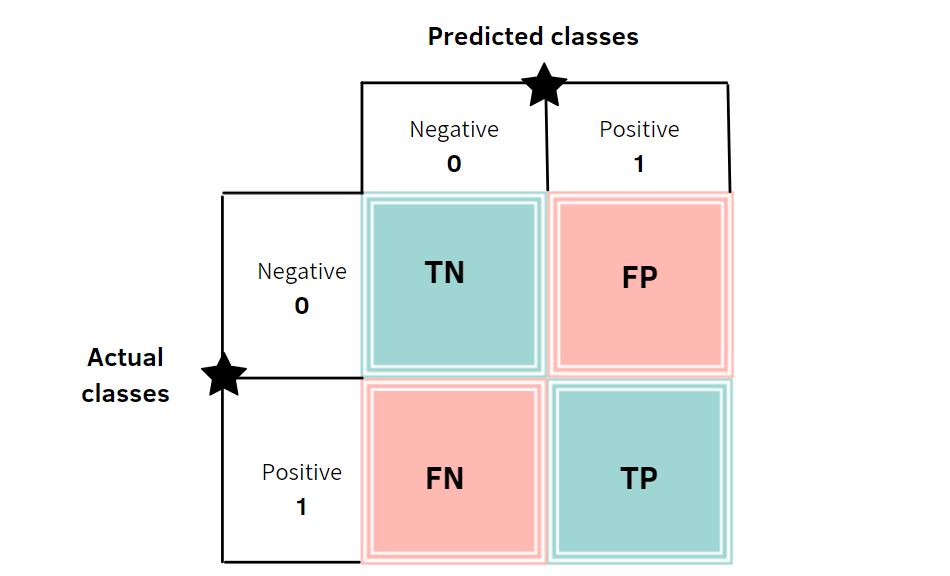



### 1.1. Precision

The accuracy of the *positive predictions*:

$$Precision = \frac{TP}{TP+FP}$$


### 1.2. Recall/Sensetivity/True Positive Rate

Ratio of *positive samples* that are **correctly** classified.

$$Recall = \frac{TP}{P} = \frac{TP}{TP+FN}$$


### 1.3. False Positive Rate


$$FPR = \frac{FP}{N} = \frac{FP}{FP+TN}$$



### 1.4. ROC curve

Only for **binary classification**. You want TPR close to 1 and FPR close to 0 which is the top left corner in the ROC curve.

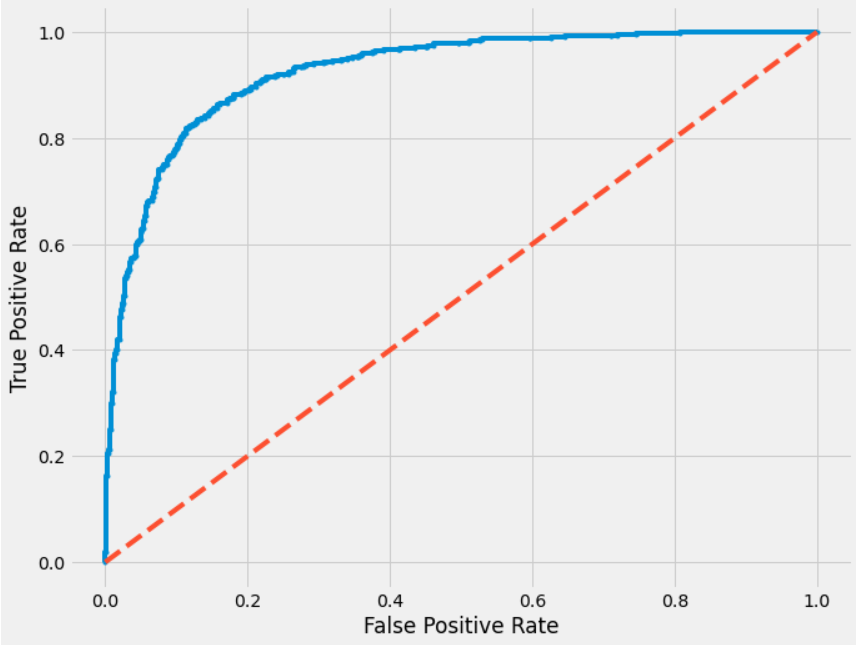

---
## 2. Linear Regression
---

Lets make some artificial data and plot the data along with the fitted linear regression model.

$$\hat{y}=\theta_0 + \theta_1 x_1 + ...+\theta_n x_n$$

Where $\theta_0$ is the intercept and $\theta_{1:n}$ are coefficients.

* **Note1:** We can train a LR using a SGD.

* **Note2:** When using SGD always make sure that the features are on the same scale!

The **cost function** for linear regression:
$$MSE(X,h_{\theta})=\frac{1}{m}Σ_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})^2$$

**Assumptions:**
- *Linearity*: assumes a linear relationship between $x$ and $y$.
- *Little to no multicollinearity*: Can be tested via Variance Inflation Factor (VIF)
- *Normality of residuals*
- *Homoscedasticity*: Variance of the residuals are the same across different values of $X$
- *Normality*: for any given $x$, $y$ is normally distributed.

The intercept is:  [4.44449297]
The coefficient is:  [[3.06576741]]


Text(0.5, 1.0, 'Linear Regression')

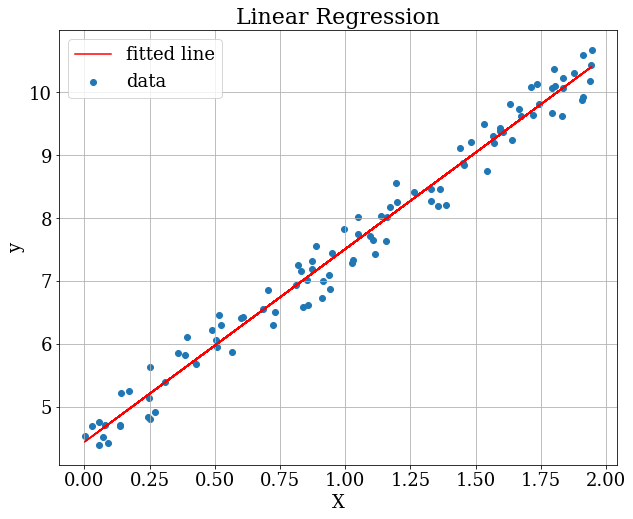

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

reg = LinearRegression()

reg.fit(X, y)

print('The intercept is: ', reg.intercept_)
print('The coefficient is: ', reg.coef_)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.family':'Serif', 'font.size':18})

plt.scatter(X, y, label='data')
plt.plot(X, reg.coef_*X + reg.intercept_, 'r', label='fitted line')
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression', fontsize=22)

### 2.1 Regularized Linear Models
To reduce the variance and prevent overfitting we can regularize the cost function:

* Ridge Regression:
$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\Sigma_{i=1}^{n} \theta_i^2$$

* Lasso Regression:
$$J(\theta) = MSE(\theta) + \alpha \Sigma_{i=1}^{n} |\theta_i|$$

* Elastic Net:
$$J(\theta) = MSE(\theta) + r\alpha \Sigma_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \frac{1}{2}\Sigma_{i=1}^{n} \theta_i^2$$

* **Note1:** Ridge regression is a good default, but if you suspect that only a few features are useful you better go with the lasso or elastic net.

Text(0.5, 1.0, 'Ridge Regression')

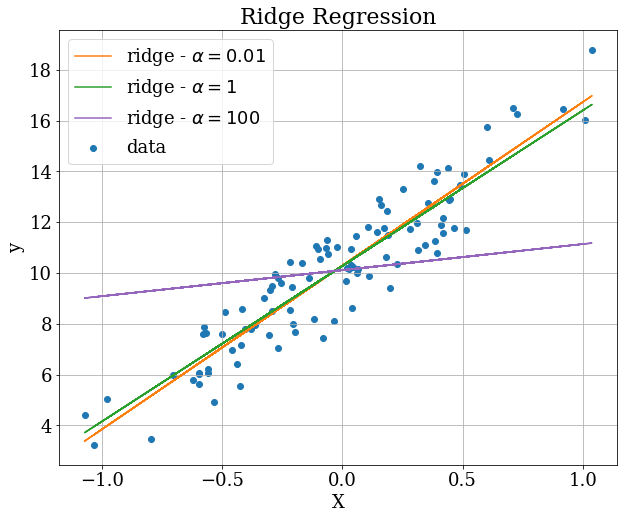

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

X = 0.5*np.random.randn(100, 1)
X_s = X + 0.8*np.random.rand(100, 1)
y = -5*X_s + 12*X + 12

ridge_001 = Ridge(alpha=0.01)
ridge_1 = Ridge(alpha=1)
ridge_100 = Ridge(alpha=100)

ridge_001.fit(X, y)
ridge_1.fit(X, y)
ridge_100.fit(X, y)


y_hat_001 = ridge_001.predict(X)
y_hat_1 = ridge_1.predict(X)
y_hat_100 = ridge_100.predict(X)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.family':'Serif', 'font.size':18})

plt.scatter(X, y, label='data')
plt.plot(X, y_hat_001, 'tab:orange', label=r'ridge - $\alpha=0.01$')
plt.plot(X, y_hat_1, 'tab:green', label=r'ridge - $\alpha=1$')
plt.plot(X, y_hat_100, 'tab:purple', label=r'ridge - $\alpha=100$')
plt.legend()
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression', fontsize=22)

---
## 3. Logistic Regression
---
Similar to linear regression but mostly used for classification to find the probability between the two classes.

$$\hat{p} = h_{\theta}(x) = \sigma(\theta^T x)$$
$$\sigma(t) = \frac{1}{1+e^{-t}}$$
$$\hat{p} = \frac{1}{1+e^{-\theta^T x}}$$

Where $\sigma(.)$ is the *sigmoid function* that outputs a number between $0$ and $1$. Usually the threshold is set to $0.5$.

Cost function of the Logistic Regression is:
$$J(\theta) = -\frac{1}{m} \Sigma_{i=1}^m[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$$

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()

X_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y_df = pd.DataFrame(iris['target'], columns=['iris_type'])
iris_data = pd.concat([X_df, y_df], axis=1)

iris_data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
5,5.4,3.9,1.7,0.4,0
127,6.1,3.0,4.9,1.8,2
50,7.0,3.2,4.7,1.4,1
16,5.4,3.9,1.3,0.4,0
67,5.8,2.7,4.1,1.0,1


In [ ]:
logit = LogisticRegression(max_iter=200)

logit.fit(X_df, y_df)
y_hat = logit.predict(X_df)

pd.DataFrame(confusion_matrix(y_df.values, y_hat), columns=iris['target_names'], index=iris['target_names'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,47,3
virginica,0,1,49


---
## 4. Support Vector Machine (SVM)
---

*Soft margin classification* is when we balance between maximizing the margin between the classes and allow for some misclassifications. (Allows margin violations)

*Hard margin classification* is only possible when the data is linearly separable. (Does not allow margin violations)

* **Note1:** With parameter $C$, we can control the margin violations. A small $C~(\sim 1)$ allows more violations but larger margin and thus more generalizable model. A high value for $C~(\sim 100)$ enforces less margin violations.
* **Note2:** With SVM we need to scale the features.
* **Note3:** Always start with linear kernel especially if you have lots of data or many features. Next try Gaussian RBF. After that you can experiment with some other kernels.
* **Note4:** RGB has a hyperparameter gamma, $\gamma$, that controls overfitting and underfitting of the models. With larger $\gamma~(\sim 0.1)$ we tend to overfit and with smaller $\gamma~(\sim 10)$ we tend to underfit.

### SVM regression

To use SVM as a regressor, we reverse the objective. SVM regression tries to fit as many instances as possible on the street (margin) while limiting the margin violations. **Parameter $ϵ$** controls the margin violations.

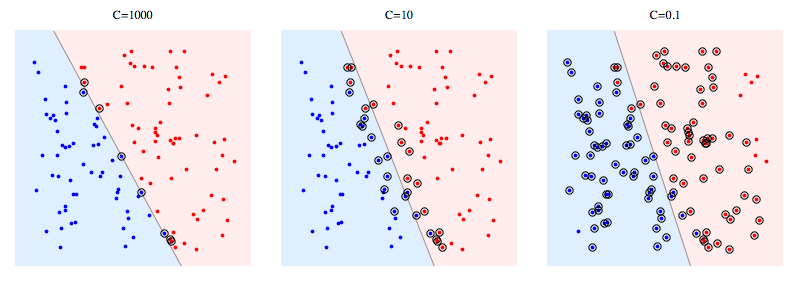

    0   1
0  97   3
1   4  46


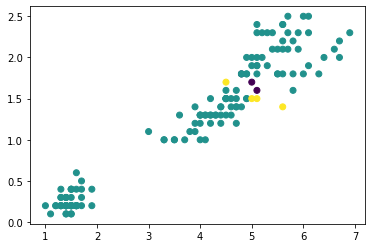

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris()

X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([('scaler', StandardScaler()),
                    ('Linear_svc', LinearSVC(C=1, loss='hinge')),])
svm_clf.fit(X, y)

y_hat = svm_clf.predict(X)
iris_data['target_pred'] = y_hat

print(pd.DataFrame(confusion_matrix(y, y_hat)))

plt.scatter(X[:,0], X[:,1], c=y-y_hat)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


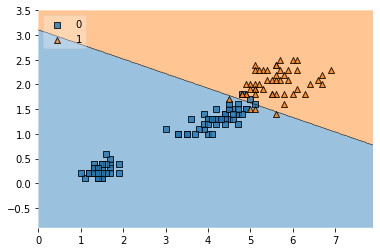

In [ ]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype(int), clf=svm_clf, legend=2)
plt.show()

---
## 5. Decision Tree
---

Decision Tree works by creating hypercubes in the feature space and assigning them into the classes. It can always reach 100\% accuracy on the training data as we can continue the splits until we have one hypercube for each training sample! The central concept in decision trees is the **Gini impurity** of each node which is defined as:

$$G_i = 1-\Sigma_{k=1}^n p_{i,k}^2$$

Note that for a node whose all samples belong to **only one class** the Gini impurity is $0$.


### 5.1. CART training algorithm
For any given feature $k$ and threshold $t_k$, there is a **cost function** defined as the weight average of the *Gini impurities* of the left and right child:

$$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$$

The algorithm proceeds by the **finding the pair of $(k, t_k)$ that minimizes the cost function**.

Stopping criteria for CART:
- `max_depth` - maximum depth of the tree.
- There is no split that further reduces the impurity.
- `min_samples_split` - the minimum number of samples a node must have to be split.
-`min_samples_leaf` - minimum number of samples each leaf node must end up having
- `max_feature` - the maximum number of features to evaluate for splitting at a node

In general increasing the `min_*` hyperparameters or decreasing the `max_*` hyperparameters result in regularizing the trees.



### 5.2. Decision Tree regressor

Decision tree can be used to do regression. Essentially it assigns each hypercube (node), the **average value** of all the samples in the node.

CART cost function for decision tree regression is:

$$J(k, t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$$

where:

$$MSE_{node} = \Sigma_{i \in node}(\hat{y}_{node}-y^{(i)})^2 ~~~and~~~ \hat{y}_{node} = \frac{1}{m_{node}} \Sigma_{i \in node}y^{(i)}$$

- **Note1:** Decision trees tend to split the feature space orthogonally so they might be susceptible to poor generalization when data transforms (rotates for example). To limit this problem, we can apply **PCA** to the feature space.
- **Note2:** Decision trees are very sensetive to the data. Small changes to the data could drastically change the decision boundry.
- **Note3:** Decision trees are prone to overfitting. So, we need to properly set the stoping criteria.
---
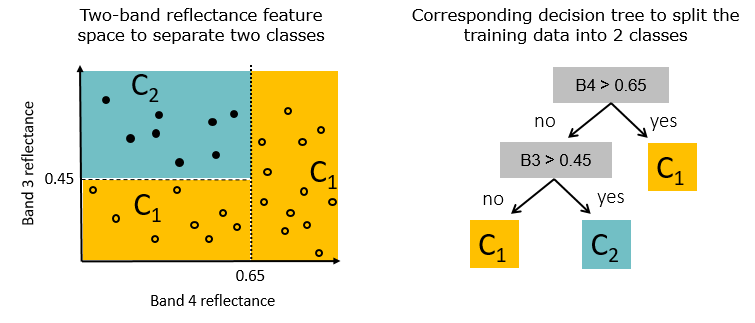

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()

# X = iris['data'][:, :]
X = iris['data'][:, (2,3)]
y = iris['target'][:]

# dt_clf = Pipeline([('PCA', PCA(n_components=2)), ('clf', DecisionTreeClassifier(max_depth=5))])
dt_clf = Pipeline([('clf', DecisionTreeClassifier(max_depth=3))])

dt_clf.fit(X, y)

y_hat = dt_clf.predict(X)

pd.DataFrame(confusion_matrix(y, y_hat))

,0,1,2
0,50,0,0
1,0,47,3
2,0,1,49


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


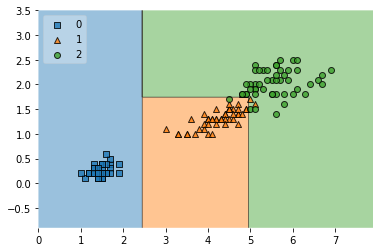

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype(int), clf=dt_clf, legend=2)
plt.show()

## 6. Random Forest

Rnadom forest is an ensemble of decision trees. It is one of the most powerful machine learning tools available today.


## 7. Ensemble Learning
It is when we use a collection of models to make the classification:

- *Hard voting*: we get the votes from all the models we have and we go with the majority class.
- *Soft voting*: Averaging the probabilities of all classifiers and making prediction based on that.

**Note1:** Soft voting usually works better than hard voting as it gives more weight to confident classifiers.

**Note2:** Ensemble methods work best when **predictors are independent** and the **models are very different in nature**.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

cancer = load_breast_cancer()

log_clf = LogisticRegression(max_iter=300)
rnd_clf = RandomForestClassifier(max_depth=4)
svm_clf = SVC(max_iter=300)

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

y_hat = voting_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_hat))
print('ensemble f1 score is:', f1_score(y_test, y_hat))

for clf, clf_name in zip((log_clf, rnd_clf, svm_clf), ('Logistic Regression', 'Random Forest', 'SVM')):
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)

  print('{} f1 score is:'.format(clf_name), f1_score(y_test, y_hat))

ensemble f1 score is: 0.981651376146789
Logistic Regression f1 score is: 0.9716981132075472
Random Forest f1 score is: 0.9674418604651163
SVM f1 score is: 0.9427312775330395


## 7.1. Bagging and Pasting
- *Bootstrap aggregating (bagging)* is an ensemble learning method that takes many random samples (**with replacement**) of the training set and trains one model one each of them and then aggregates the predictions.

- *Pasting* is when the sampling is done **without replacement**.

**Note1:** Bagging reduces the variance.

**Note2:** With bagging we can evaluate the ensemble model using *out-of-bag* (OOB) samples without the need to have a separate validation set.

**Note3:** In scikit-Learn we can get the OOB score via `oob_score_`. We can also get the decision probabilities for the training instances using `oob_decision_function_` attibute.

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

wine_data = load_wine()
X = wine_data['data']
y = wine_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, oob_score=True)
bag_clf.fit(X_train, y_train)

y_hat = bag_clf.predict(X_test)
print('The OOB score is: ', bag_clf.oob_score_)
pd.DataFrame(confusion_matrix(y_test, y_hat))

The OOB score is:  0.9647887323943662


,0,1,2
0,14,0,0
1,1,14,1
2,0,0,6


## 7.2. Random Patches and Random Subspaces

Another idea is to randomly sample features.

- Random sampling of training samples and features simultaneously is called **random patches**.
- Only random sampling of features is called **random subspaces**.

**Notes1:** Random sampling of features increases the diversity of the models and reduces the variance at the cost of adding a bit more bias.

# 8. Random Forest

A random forest is an ensemble of *Decision Trees*, generally trained via the **bagging** method. Additionally, at every node, it **searches in a random subset of the features** instead of searching for the best split among all features. This increases diversity of the models.

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score

wine_data = load_wine()
X = wine_data['data']
y = wine_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_leaf_nodes=16, n_jobs=-1)
rf_clf.fit(X_train, y_train)

y_hat = rf_clf.predict(X_test)

print('The balanced accracy is: {} and the f1 score is: {}'.format(balanced_accuracy_score(y_test, y_hat), f1_score(y_test, y_hat, average='micro')))
pd.DataFrame(confusion_matrix(y_test, y_hat))

The balanced accracy is: 1.0 and the f1 score is: 1.0


,0,1,2
0,19,0,0
1,0,21,0
2,0,0,14
